<a href="https://colab.research.google.com/github/jeddyclass/202207.NCUT/blob/main/session_03_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [69]:
# ref: https://towardsdatascience.com/eda-of-the-iris-dataset-190f6dfd946d
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
import warnings
from matplotlib.font_manager import fontManager

In [70]:
!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download
sns.set(style='darkgrid')
plt.rcParams['axes.unicode_minus']=False
fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
mpl.rc('font', family='Taipei Sans TC Beta')
plt.rcParams['font.family']='Taipei Sans TC Beta'

--2022-07-10 08:02:24--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 108.177.127.101, 108.177.127.113, 108.177.127.100, ...
Connecting to drive.google.com (drive.google.com)|108.177.127.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/e5a36najdujoaaepfags9h3ej7791psm/1657440075000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_?uuid=8500644c-5b09-4e7b-b91c-3e59ec1a0541 [following]
--2022-07-10 08:02:25--  https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/e5a36najdujoaaepfags9h3ej7791psm/1657440075000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_?uuid=8500644c-5b09-4e7b-b91c-3e59ec1a0541
Resolving doc-0k-9o-docs.googleusercontent.com (doc-0k-9o-docs.googleusercontent.com)... 108.177.119.132, 2a00:1450:4013:c00::84
Connecting to d

In [71]:
#載入數據
iris=load_iris()
#display(iris)
print(iris.data[:10],iris.target[:10])
#iris.feature_names:特徵列名稱(sepal lenght/sepal width/petal length/petal width)
#iris.target_name:鳶尾花名(setosa/versicolor/virginica)
print(iris.feature_names,iris.target_names)
#iris_df = pd.DataFrame(data= np.c_[iris['data'], iris['target']], columns= iris['feature_names'] + ['species'])


iris_df= pd.DataFrame(data= np.c_[iris['data'], iris['target']], columns= iris['feature_names'] + ['target'])
iris_df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)


[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]] [0 0 0 0 0 0 0 0 0 0]
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'] ['setosa' 'versicolor' 'virginica']


In [72]:
iris_df.dtypes

sepal length (cm)     float64
sepal width (cm)      float64
petal length (cm)     float64
petal width (cm)      float64
target                float64
species              category
dtype: object

In [106]:
#iris_df.drop(['target'],axis=1)
#iris_df.drop(columns=['target'])
iris_df = iris_df.drop('target', axis=1)
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [107]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [108]:
iris_df.shape

(150, 5)

In [109]:
iris_df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'species'],
      dtype='object')

In [110]:
# Further inspecting the dataframe
def inspect_data(data):
    return pd.DataFrame({"Data Type":data.dtypes,"No of Levels":data.apply(lambda x: x.nunique(),axis=0), "Levels":data.apply(lambda x: str(x.unique()),axis=0)})
inspect_data(iris_df)

,Data Type,No of Levels,Levels
sepal length (cm),float64,35,[5.1 4.9 4.7 4.6 5. 5.4 4.4 4.8 4.3 5.8 5.7 5...
sepal width (cm),float64,23,[3.5 3. 3.2 3.1 3.6 3.9 3.4 2.9 3.7 4. 4.4 3...
petal length (cm),float64,43,[1.4 1.3 1.5 1.7 1.6 1.1 1.2 1. 1.9 4.7 4.5 4...
petal width (cm),float64,22,[0.2 0.4 0.3 0.1 0.5 0.6 1.4 1.5 1.3 1.6 1. 1...
species,category,3,"['setosa', 'versicolor', 'virginica']\nCategor..."


In [111]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   sepal length (cm)  150 non-null    float64 
 1   sepal width (cm)   150 non-null    float64 
 2   petal length (cm)  150 non-null    float64 
 3   petal width (cm)   150 non-null    float64 
 4   species            150 non-null    category
dtypes: category(1), float64(4)
memory usage: 5.1 KB


In [112]:
iris_df.describe(include='all')

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.057333,3.758000,1.199333,NaN
std,0.828066,0.435866,1.765298,0.762238,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


In [113]:
iris_df.describe() 

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [114]:
iris_df.isnull().sum(axis=0)

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64

In [115]:
iris_df.skew()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


sepal length (cm)    0.314911
sepal width (cm)     0.318966
petal length (cm)   -0.274884
petal width (cm)    -0.102967
dtype: float64

In [116]:
iris_df.kurt()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


sepal length (cm)   -0.552064
sepal width (cm)     0.228249
petal length (cm)   -1.402103
petal width (cm)    -1.340604
dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


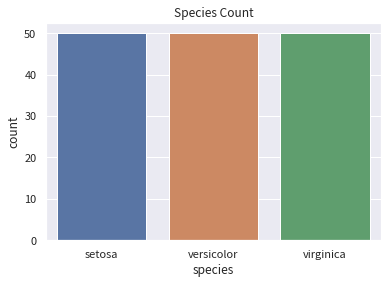

In [117]:
plt.title('Species Count')
sns.countplot(iris_df['species']);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


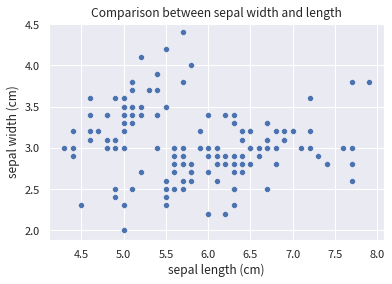

In [118]:
plt.title('Comparison between sepal width and length')
sns.scatterplot(iris_df['sepal length (cm)'], iris_df['sepal width (cm)']);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


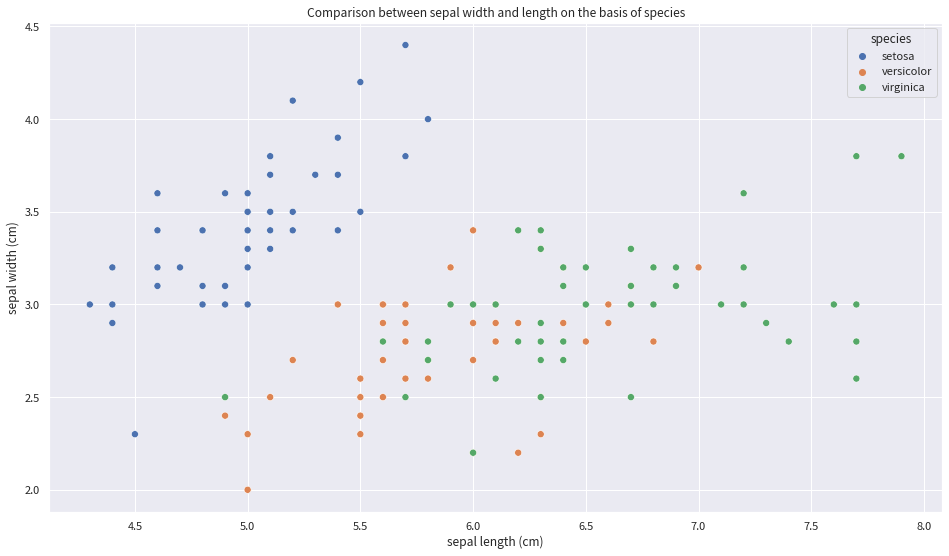

In [119]:
plt.figure(figsize=(16,9))
plt.title('Comparison between sepal width and length on the basis of species')
sns.scatterplot(iris_df['sepal length (cm)'], iris_df['sepal width (cm)'], hue = iris_df['species'], s= 50);

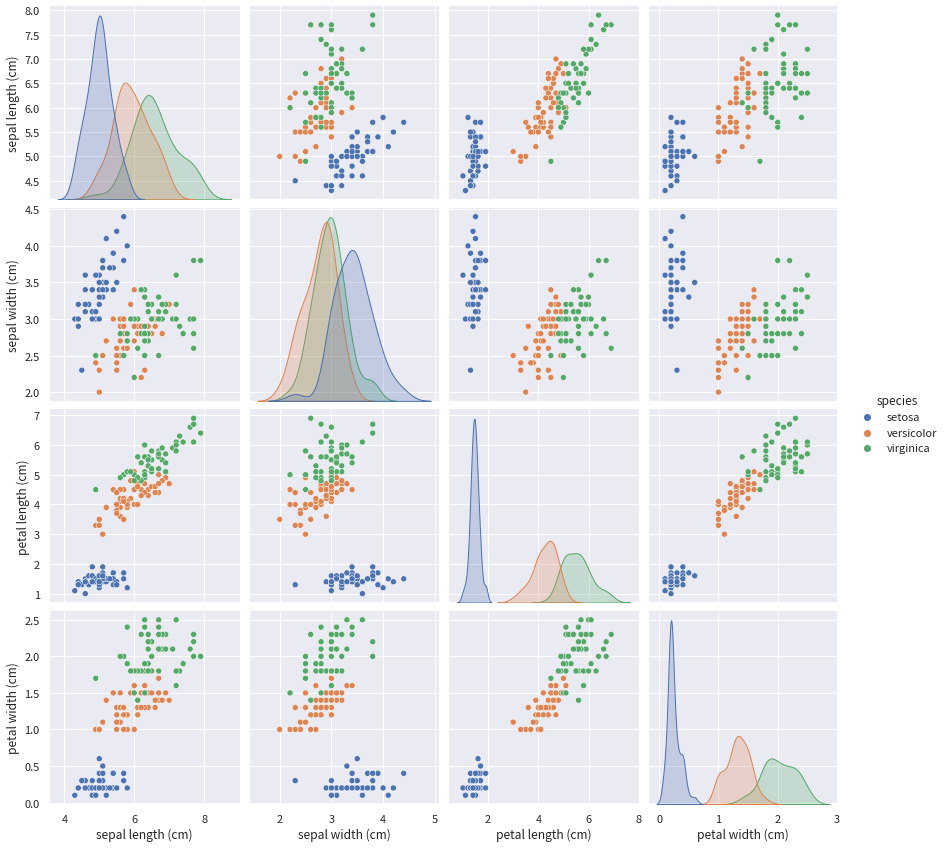

In [120]:
sns.pairplot(iris_df,hue="species",height=3);

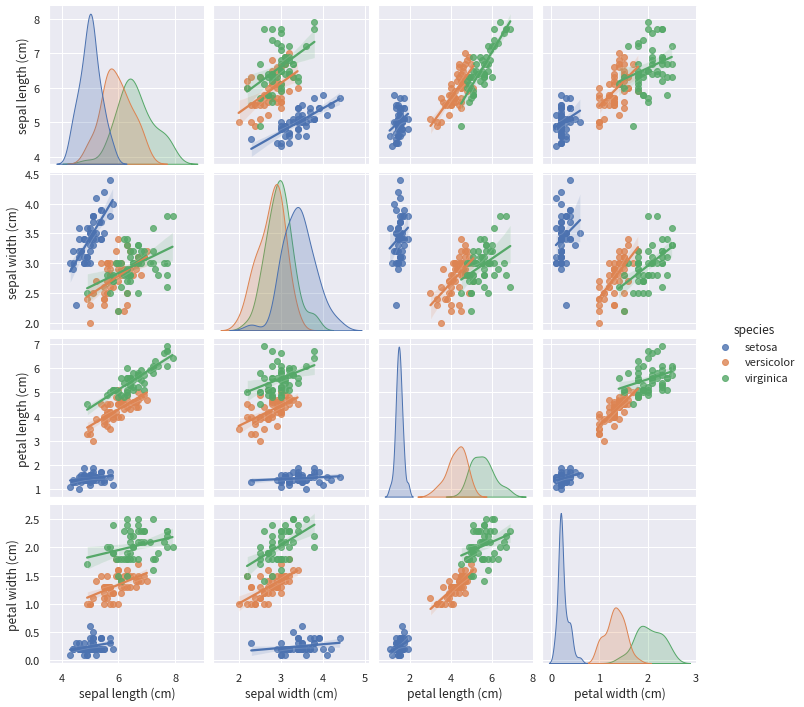

In [129]:
sns.pairplot(iris_df,hue="species",kind="reg", diag_kind="kde")

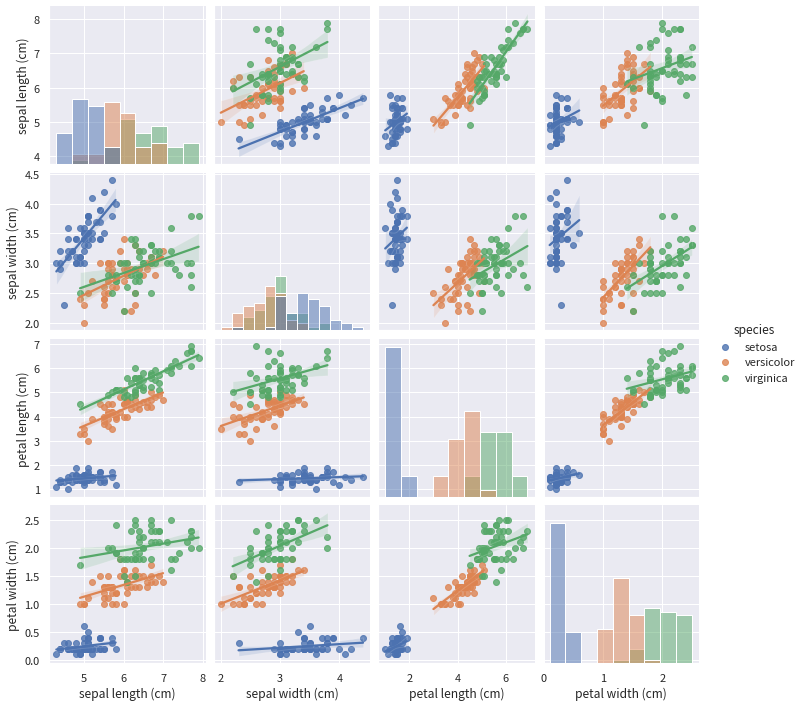

In [130]:
sns.pairplot(iris_df,hue="species",kind="reg", diag_kind="hist")

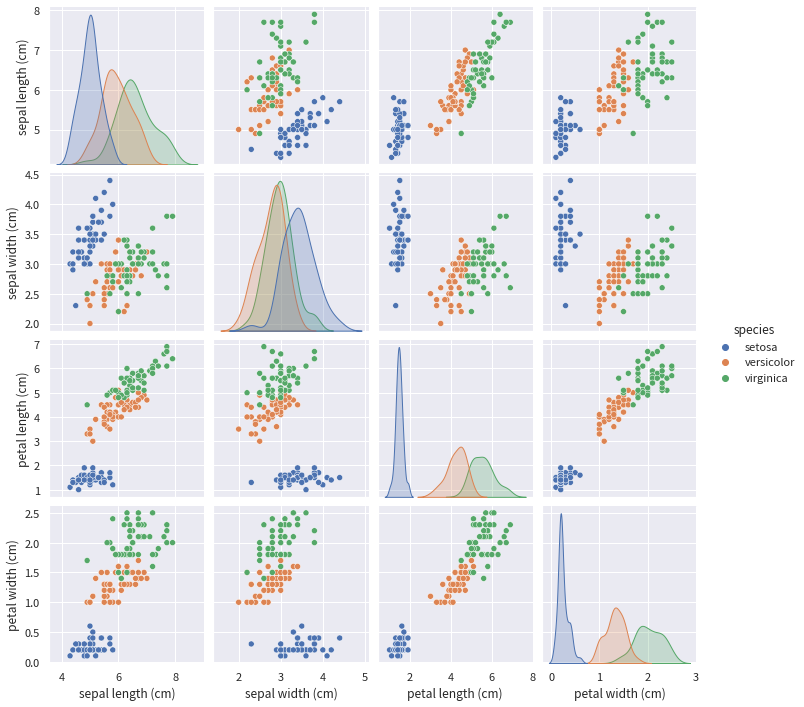

In [131]:
sns.pairplot(iris_df,hue="species",kind="scatter", diag_kind="kde")

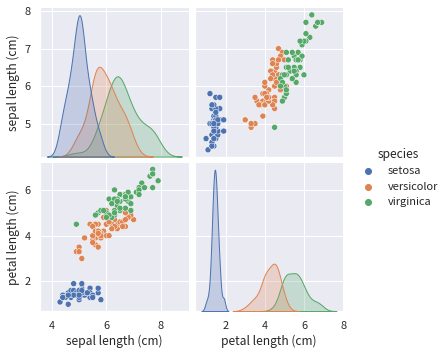

In [132]:
sns.pairplot(iris_df,hue="species",vars=["sepal length (cm)","petal length (cm)"]) 

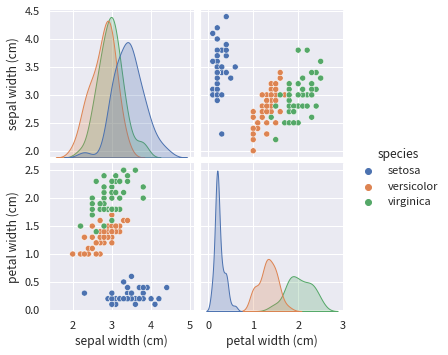

In [133]:
sns.pairplot(iris_df,hue="species",vars=["sepal width (cm)","petal width (cm)"]) 

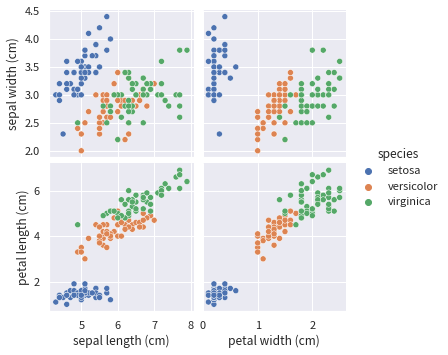

In [134]:
sns.pairplot(iris_df,hue="species",x_vars=["sepal length (cm)","petal width (cm)"], y_vars=["sepal width (cm)","petal length (cm)"]) 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

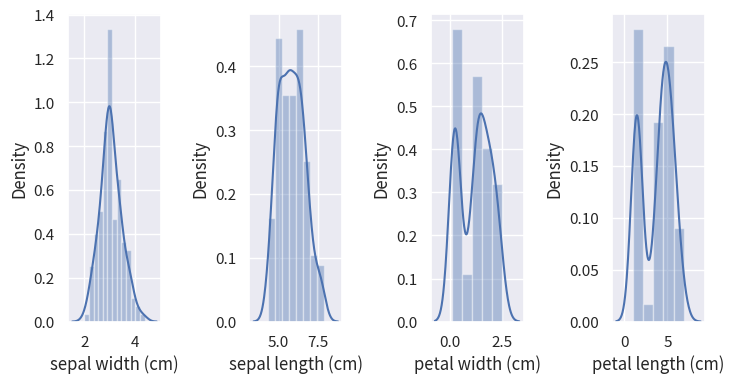

In [122]:
cols = ['sepal width (cm)', 'sepal length (cm)', 'petal width (cm)', 'petal length (cm)']
plt.figure(figsize=(20,4), dpi=100)
i = 1
for col in cols:
    plt.subplot(1,11,i)
    sns.distplot(iris_df[col])
    i = i+1
plt.tight_layout()
plt.show()

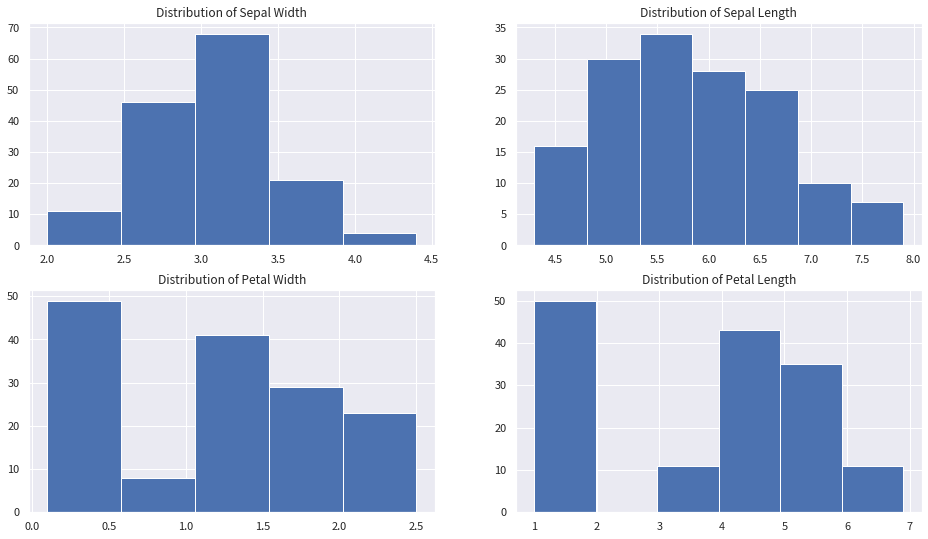

In [123]:
fig, axes = plt.subplots(2, 2, figsize=(16,9))
axes[0,0].set_title("Distribution of Sepal Width")
axes[0,0].hist(iris_df['sepal width (cm)'], bins=5);
axes[0,1].set_title("Distribution of Sepal Length")
axes[0,1].hist(iris_df['sepal length (cm)'], bins=7);
axes[1,0].set_title("Distribution of Petal Width")
axes[1,0].hist(iris_df['petal width (cm)'], bins=5);
axes[1,1].set_title("Distribution of Petal Length")
axes[1,1].hist(iris_df['petal length (cm)'], bins=6);

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

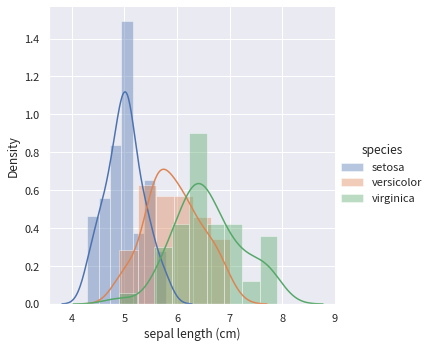

In [124]:
sns.FacetGrid(iris_df,hue="species",height=5).map(sns.distplot,"sepal length (cm)").add_legend();

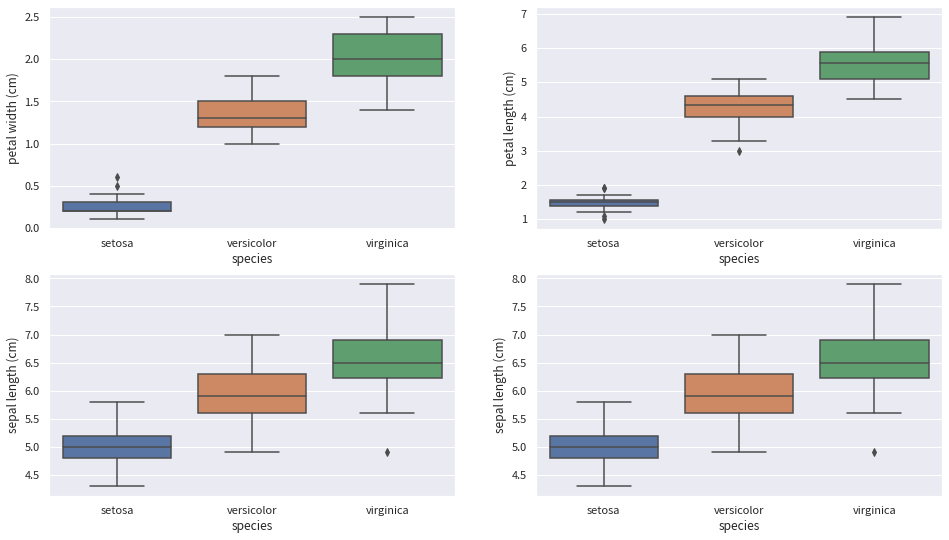

In [125]:
fig, axes = plt.subplots(2, 2, figsize=(16,9))
sns.boxplot(  y="petal width (cm)", x= "species", data=iris_df,  orient='v' , ax=axes[0, 0])
sns.boxplot(  y="petal length (cm)", x= "species", data=iris_df,  orient='v' , ax=axes[0, 1])
sns.boxplot(  y="sepal length (cm)", x= "species", data=iris_df,  orient='v' , ax=axes[1, 0])
sns.boxplot(  y="sepal length (cm)", x= "species", data=iris_df,  orient='v' , ax=axes[1, 1])
plt.show()

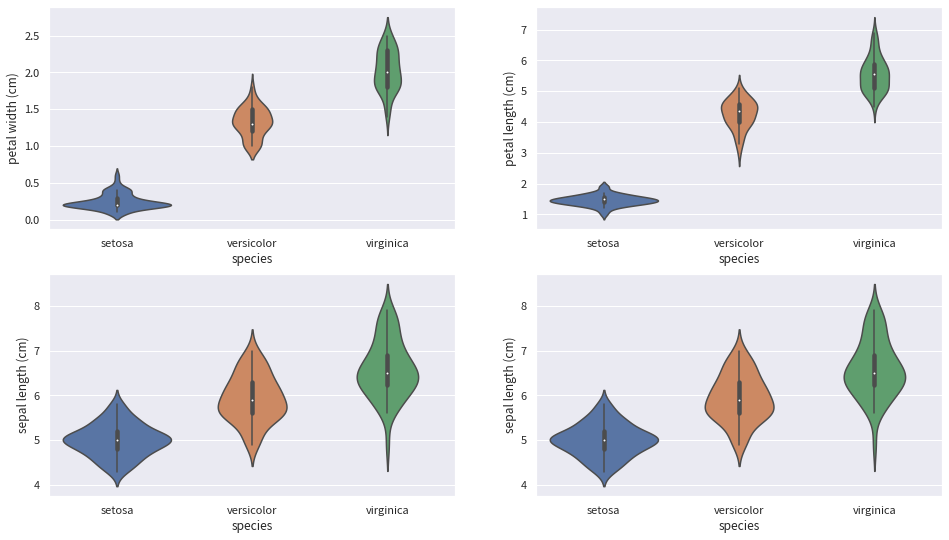

In [126]:
fig, axes = plt.subplots(2, 2, figsize=(16,9))
sns.violinplot(y="petal width (cm)", x= "species", data=iris_df,  orient='v' , ax=axes[0, 0])
sns.violinplot(y="petal length (cm)", x= "species", data=iris_df,  orient='v' , ax=axes[0, 1])
sns.violinplot(y="sepal length (cm)", x= "species", data=iris_df,  orient='v' , ax=axes[1, 0])
sns.violinplot(y="sepal length (cm)", x= "species", data=iris_df,  orient='v' , ax=axes[1, 1])
plt.show()